1. [Testing calc_rsq](#Testing-calc_rsq)
    1. [Generating Random Correlation Matrices](#Generate-random-correlation-matrices)
    2. [Real Data](#Real-Data)
    3. [Try out the new icc function too](#Try-out-the-new-icc-function-too)
    4. [Generate known correlation matrices](#Generate-known-correlation-matrices)

# Testing `calc_rsq`

We're getting weird results from our iterations, so let's see what's going on. I'm going to run through this code in python2 and python3.

In [1]:
import sys
print (sys.version)

2.7.12 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [2]:
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def exclude_nan(x,y):
    """
    Exclude NaN values if either entry in a pair of vectors has NaN
    """
    idx = np.logical_not(np.logical_or(np.isnan(x), np.isnan(y)))
    x = x[idx]
    y = y[idx]
    n = len(x)
    return [x, y, n]

def compute_icc(av_corr_mat_A, av_corr_mat_B):
    """
    This function computes the inter-class correlation (ICC) of the
    two classes represented by the x and y numpy vectors.
    """

    inds = np.triu_indices_from(av_corr_mat_B, k=1)
    x = av_corr_mat_A[inds]
    y = av_corr_mat_B[inds]
    
    if all(x == y):
        return 1

    [x, y, n] = exclude_nan(x,y)

    ## Need at least 3 data points to compute this
    if n < 3:
        return np.nan

    Sx = sum(x); Sy = sum(y);
    Sxx = sum(x*x); Sxy = sum( (x+y)**2 )/2; Syy = sum(y*y)

    fact = ((Sx + Sy)**2)/(n*2)
    SS_tot = Sxx + Syy - fact
    SS_among = Sxy - fact
    SS_error = SS_tot - SS_among

    MS_error = SS_error/n
    MS_among = SS_among/(n-1)
    ICC = (MS_among - MS_error) / (MS_among + MS_error)

    return ICC

In [4]:
def calc_rsq(av_corr_mat_A, av_corr_mat_B):
    """
    From wikipedia: https://en.wikipedia.org/wiki/Coefficient_of_determination
    
    Rsq = 1 - (SSres / SStot)
    
    SSres is calculated as the sum of square errors (where the error
    is the difference between x and y).
    
    SStot is calculated as the total sum of squares in y.
    """
    # Get the data we need
    inds = np.triu_indices_from(av_corr_mat_B, k=1)
    x = av_corr_mat_A[inds]
    y = av_corr_mat_B[inds]
    
    # Calculate the error/residuals
    res = y - x

    SSres = np.sum(res**2)
    
    # Sum up the total error in y
    y_var = y - np.mean(y)
    
    SStot = np.sum(y_var**2)
    
    # R squared
    Rsq = 1 - (SSres/SStot)
    
    return Rsq

## Generate random correlation matrices

In [5]:
df1 = pd.DataFrame(np.random.normal(0, 1, size=(100, 20)))
df2 = pd.DataFrame(np.random.normal(0, 1, size=(100, 20)))
df1corrmat = df1.corr()
df2corrmat = df2.corr()

In [6]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.459285,-1.686240,0.266784,-0.905891,2.106693,-1.349512,0.738959,2.552666,-1.151652,-0.009456,-0.510409,-0.228727,-1.305429,0.231662,-2.200521,0.565483,-0.030350,-1.229633,0.588084,1.829472
1,0.506169,-1.164250,1.827465,-1.770695,1.352681,-0.174386,-0.753277,1.457260,1.374941,1.494609,-0.930346,1.817129,-0.467384,-1.975660,-0.151185,-0.451188,-0.315243,-0.522146,-0.051104,0.050784
2,0.654583,-0.333513,-1.227655,2.244545,1.245186,0.011734,-0.449833,1.189656,-0.519491,0.137518,-0.525419,0.488988,-2.210454,0.586466,1.783655,-0.853663,0.152848,-0.147935,-1.969561,1.255399
3,1.245908,0.395189,-0.734785,-1.133730,-0.116817,1.193006,-0.193593,-0.403535,0.093474,-0.480070,-1.163256,1.209736,-0.726896,-0.431677,0.934388,0.053691,0.496808,-0.535399,0.237710,-1.192354
4,-0.676168,1.160670,-1.308033,-1.001344,0.683118,0.756826,-2.101759,0.614674,-0.982672,1.214758,0.086796,0.959539,-1.081500,-0.370933,0.960965,1.092834,0.083327,0.374810,-0.115915,0.912975


In [7]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.210888,-0.575109,-0.823891,0.040784,0.200019,0.323493,-0.105688,0.272035,-2.591852,-0.216854,0.419755,0.915423,-0.779843,-0.555857,-0.246218,-1.615118,-0.707864,-0.275811,0.042361,-0.126864
1,1.630538,0.386715,-0.258144,1.235049,1.856735,-0.683230,-1.578096,0.600840,0.049448,-0.009517,-1.147568,0.068609,0.644837,2.349033,0.865901,-0.568317,-1.457061,-0.708791,-0.951476,-1.096468
2,-0.960281,0.676571,0.489358,1.969809,0.354284,-0.359908,-0.921829,-0.016688,-0.605573,-1.012741,-2.140759,0.105906,-0.141661,-0.836287,-0.001026,0.864993,-0.412931,-0.903577,1.568963,0.660652
3,0.046802,-0.183966,0.588425,1.245006,0.846502,-1.382787,-0.284206,-1.486366,-0.418959,1.213071,0.713727,0.148747,-0.572446,-0.236609,2.602145,-0.191777,0.254296,-0.610304,1.041272,0.039800
4,-0.021216,1.627869,1.330040,0.895645,-0.951609,-0.711469,0.680365,-1.647638,-0.831279,-2.745774,0.609975,0.537708,1.099521,0.089528,1.309185,-1.176433,-1.745139,1.179316,1.234660,0.368402


In [8]:
df1corrmat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.049203,-0.064054,-0.033736,0.059685,0.159797,0.069915,0.010470,-0.026670,-0.104885,-0.035209,0.102059,-0.048309,0.005395,0.096526,-0.048817,-0.001529,-0.084312,-0.072526,0.067794
1,0.049203,1.000000,-0.084914,0.047906,0.046863,0.043337,0.118886,-0.115906,-0.202099,0.045330,0.067816,0.074503,0.134351,0.037388,-0.040035,0.054126,-0.072243,0.117685,-0.017548,0.203677
2,-0.064054,-0.084914,1.000000,-0.097689,0.153320,-0.093511,0.008297,0.156848,-0.062196,-0.099885,-0.048885,0.161584,0.103379,-0.217554,-0.212386,0.074049,0.017782,-0.004589,0.111073,0.070414
3,-0.033736,0.047906,-0.097689,1.000000,0.011701,-0.204898,0.070953,0.047657,-0.085712,-0.044148,-0.032999,-0.311410,0.127964,-0.029786,0.076345,-0.028107,0.062226,-0.213142,-0.158022,0.076466
4,0.059685,0.046863,0.153320,0.011701,1.000000,-0.045302,0.091356,0.060248,0.071931,-0.034660,-0.160051,0.034842,-0.045840,-0.043112,0.094392,0.123568,-0.093966,-0.028949,0.052764,0.148516


In [9]:
df2corrmat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.054047,0.085508,-0.005495,-0.105998,0.160550,-0.038224,0.061554,0.001209,0.045809,-0.098205,-0.064388,-0.034882,0.216802,-0.103821,0.046249,-0.044714,-0.157337,0.039298,-0.048467
1,0.054047,1.000000,0.114760,-0.020465,-0.068890,-0.031002,-0.041997,-0.120929,0.038365,-0.155543,-0.073841,-0.257806,-0.011478,-0.124288,0.184181,0.095425,-0.060776,-0.010872,-0.064313,0.029999
2,0.085508,0.114760,1.000000,-0.013640,-0.058635,0.045613,-0.029310,0.032549,0.033230,-0.029492,0.000309,0.048134,0.049339,0.025087,0.098909,0.167954,-0.110658,-0.022863,-0.043435,0.095169
3,-0.005495,-0.020465,-0.013640,1.000000,0.181982,-0.011824,-0.209502,-0.038624,0.009760,-0.050558,-0.204551,-0.025663,-0.176593,0.174656,-0.062856,-0.019197,-0.162285,-0.167845,-0.110326,-0.030830
4,-0.105998,-0.068890,-0.058635,0.181982,1.000000,-0.154008,-0.120273,0.065169,-0.111532,0.160357,-0.108478,0.131126,-0.135120,-0.025238,-0.056955,0.038775,-0.187141,0.121707,0.081552,-0.018331


### Calculate $R^2$ from random matrices

In [10]:
calc_rsq(df1.corr().as_matrix(), df2.corr().as_matrix())

-1.136742306796056

Now let's walk through the code above to see what it's doing.

In [11]:
inds = np.triu_indices_from( df2.corr().as_matrix(), k=1)
inds

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13,
        13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16,
        17, 17, 18]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14

In [12]:
x =  df1.corr().as_matrix()[inds]
y =  df2.corr().as_matrix()[inds]

In [13]:
print(str(df1.corr().shape) + " matrix gives an upper triangle with length " + str((20*(20-1))/2))

(20, 20) matrix gives an upper triangle with length 190


`df.corr()` is a $20\times 20$ matrix, so getting the upper triangle should give us $\frac{20\cdot (20-1)}{2}=190$ cells in the upper triangle.

In [14]:
len(x)

190

Yay, we get what we expect!

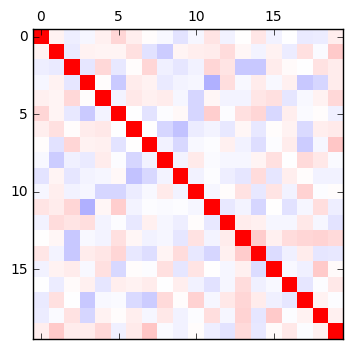

In [15]:
plt.matshow(df1.corr(), vmin=-1, vmax=1, cmap='bwr')

In [16]:
df1.corr().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.00,0.05,-0.06,-0.03,0.06,0.16,0.07,0.01,-0.03,-0.10,-0.04,0.10,-0.05,0.01,0.10,-0.05,-0.00,-0.08,-0.07,0.07
1,0.05,1.00,-0.08,0.05,0.05,0.04,0.12,-0.12,-0.20,0.05,0.07,0.07,0.13,0.04,-0.04,0.05,-0.07,0.12,-0.02,0.20
2,-0.06,-0.08,1.00,-0.10,0.15,-0.09,0.01,0.16,-0.06,-0.10,-0.05,0.16,0.10,-0.22,-0.21,0.07,0.02,-0.00,0.11,0.07
3,-0.03,0.05,-0.10,1.00,0.01,-0.20,0.07,0.05,-0.09,-0.04,-0.03,-0.31,0.13,-0.03,0.08,-0.03,0.06,-0.21,-0.16,0.08
4,0.06,0.05,0.15,0.01,1.00,-0.05,0.09,0.06,0.07,-0.03,-0.16,0.03,-0.05,-0.04,0.09,0.12,-0.09,-0.03,0.05,0.15
5,0.16,0.04,-0.09,-0.20,-0.05,1.00,-0.00,-0.10,-0.01,0.02,-0.16,0.19,-0.01,0.12,0.16,-0.15,0.07,-0.02,0.01,-0.06
6,0.07,0.12,0.01,0.07,0.09,-0.00,1.00,0.01,-0.16,-0.24,-0.07,-0.05,-0.09,0.04,-0.09,0.01,0.05,-0.14,0.07,0.09
7,0.01,-0.12,0.16,0.05,0.06,-0.10,0.01,1.00,-0.05,-0.15,-0.03,-0.01,0.06,-0.05,-0.13,-0.01,0.07,-0.20,-0.03,0.23
8,-0.03,-0.20,-0.06,-0.09,0.07,-0.01,-0.16,-0.05,1.00,-0.04,0.08,-0.02,-0.04,-0.04,0.04,0.12,-0.00,0.14,0.09,-0.02
9,-0.10,0.05,-0.10,-0.04,-0.03,0.02,-0.24,-0.15,-0.04,1.00,-0.05,-0.01,-0.06,-0.10,0.14,-0.10,0.07,0.01,-0.05,-0.05


In [17]:
x.round(2)

array([ 0.05, -0.06, -0.03,  0.06,  0.16,  0.07,  0.01, -0.03, -0.1 ,
       -0.04,  0.1 , -0.05,  0.01,  0.1 , -0.05, -0.  , -0.08, -0.07,
        0.07, -0.08,  0.05,  0.05,  0.04,  0.12, -0.12, -0.2 ,  0.05,
        0.07,  0.07,  0.13,  0.04, -0.04,  0.05, -0.07,  0.12, -0.02,
        0.2 , -0.1 ,  0.15, -0.09,  0.01,  0.16, -0.06, -0.1 , -0.05,
        0.16,  0.1 , -0.22, -0.21,  0.07,  0.02, -0.  ,  0.11,  0.07,
        0.01, -0.2 ,  0.07,  0.05, -0.09, -0.04, -0.03, -0.31,  0.13,
       -0.03,  0.08, -0.03,  0.06, -0.21, -0.16,  0.08, -0.05,  0.09,
        0.06,  0.07, -0.03, -0.16,  0.03, -0.05, -0.04,  0.09,  0.12,
       -0.09, -0.03,  0.05,  0.15, -0.  , -0.1 , -0.01,  0.02, -0.16,
        0.19, -0.01,  0.12,  0.16, -0.15,  0.07, -0.02,  0.01, -0.06,
        0.01, -0.16, -0.24, -0.07, -0.05, -0.09,  0.04, -0.09,  0.01,
        0.05, -0.14,  0.07,  0.09, -0.05, -0.15, -0.03, -0.01,  0.06,
       -0.05, -0.13, -0.01,  0.07, -0.2 , -0.03,  0.23, -0.04,  0.08,
       -0.02, -0.04,

These also match, so that's good. Time to walk through the $R^2$ calculation.

In [18]:
res = y - x
res

array([ 0.00484325,  0.14956132,  0.02824107, -0.16568275,  0.0007528 ,
       -0.10813853,  0.05108433,  0.02787938,  0.15069444, -0.06299618,
       -0.16644774,  0.01342698,  0.21140692, -0.2003479 ,  0.09506584,
       -0.04318503, -0.07302524,  0.11182322, -0.11626077,  0.1996742 ,
       -0.06837048, -0.11575321, -0.07433915, -0.16088339, -0.00502348,
        0.24046337, -0.20087255, -0.14165694, -0.33230942, -0.14582863,
       -0.16167605,  0.22421688,  0.04129845,  0.01146691, -0.12855722,
       -0.04676454, -0.17367812,  0.08404902, -0.21195513,  0.13912395,
       -0.03760721, -0.12429981,  0.09542587,  0.07039282,  0.04919374,
       -0.11344933, -0.05403977,  0.24264059,  0.31129506,  0.09390546,
       -0.12843969, -0.01827382, -0.15450749,  0.02475504,  0.17028086,
        0.19307355, -0.28045515, -0.08628076,  0.09547213, -0.00640978,
       -0.17155196,  0.28574728, -0.30455773,  0.20444145, -0.13920137,
        0.00891002, -0.22451114,  0.0452975 ,  0.04769606, -0.10

In [19]:
SSres = np.sum(res**2)
SSres

3.9671904205412627

In [20]:
# Sum up the total error in y
y_var = y - np.mean(y)
y_var

array([ 0.05670825,  0.08816937, -0.00283366, -0.1033362 ,  0.16321199,
       -0.03556195,  0.0642156 ,  0.00387096,  0.04847071, -0.09554336,
       -0.06172665, -0.03222049,  0.21946371, -0.10115973,  0.04891034,
       -0.04205236, -0.15467516,  0.04195925, -0.04580553,  0.1174215 ,
       -0.01780312, -0.06622833, -0.02834024, -0.03933554, -0.11826741,
        0.04102643, -0.1528813 , -0.07117916, -0.25514436, -0.0088164 ,
       -0.12162651,  0.18684311,  0.09808656, -0.058114  , -0.0082106 ,
       -0.06165115,  0.03266059, -0.01097862, -0.0559735 ,  0.04827493,
       -0.02664864,  0.03521033,  0.03589133, -0.02683015,  0.0029709 ,
        0.0507962 ,  0.05200066,  0.02774864,  0.10157094,  0.17061601,
       -0.10799585, -0.02020084, -0.04077321,  0.09783084,  0.18464378,
       -0.00916256, -0.20684067, -0.03596189,  0.0124219 , -0.04789641,
       -0.20188906, -0.02300145, -0.17393152,  0.1773173 , -0.06019419,
       -0.01653532, -0.15962323, -0.16518296, -0.10766456, -0.02

In [21]:
SStot = np.sum(y_var**2)
SStot

1.8566536581989044

In [22]:
# R squared
Rsq = 1 - (SSres/SStot)
Rsq

-1.136742306796056

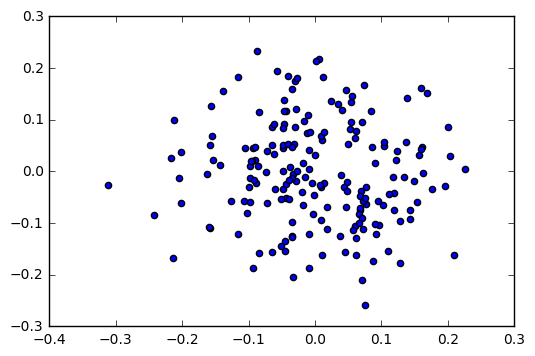

In [23]:
plt.scatter(x, y)

### Conclusion

Python 3: This works as expected, but we had to use `as_matrix()` to get it to not error in `calc_rsq()`.
Python 2: This works as expected, but we had to use `as_matrix()` to get it to not error in `calc_rsq()`.

# Real Data

In [24]:
behav_data_f = 'Phenotypic_V1_0b_preprocessed1.csv'

In [25]:
df = pd.read_csv(behav_data_f)
df = df.loc[df['func_perc_fd'].notnull(), :]
df = df.loc[df['FILE_ID']!='no_filename', :]
df['AGE_YRS'] = np.floor(df['AGE_AT_SCAN'])
df.head()

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP,AGE_YRS
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,24.0
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,19.0
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0,13.0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1,13.0
5,5,6,50007,6,50007,PITT,Pitt_0050007,1,1,17.78,...,OK,NaN,maybe,ic-cerebellum_temporal_lob,OK,NaN,OK,NaN,1,17.0


In [26]:
nsubs = 100
start1 = 0
start2 = 100
for i, (sub, f_id) in enumerate(df.loc[start1:(start1+nsubs),['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat = ts_df.corr()

    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat1 = np.empty([corr_mat.shape[0], corr_mat.shape[1], nsubs])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat1[:, :, i] = corr_mat

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat1 = np.nanmean(all_corr_mat1, axis=2)

for i, (sub, f_id) in enumerate(df.loc[start2:(start2+nsubs),['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat = ts_df.corr()

    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat2 = np.empty([corr_mat.shape[0], corr_mat.shape[1], nsubs])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat2[:, :, i] = corr_mat

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat2 = np.nanmean(all_corr_mat2, axis=2)

In [27]:
[all_corr_mat1.shape, all_corr_mat2.shape]

[(116, 116, 100), (116, 116, 100)]

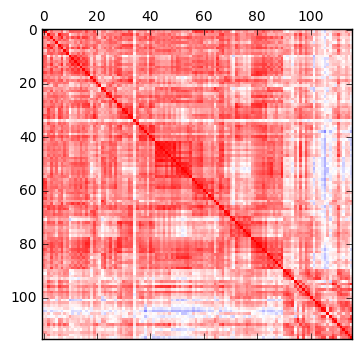

In [28]:
plt.matshow(all_corr_mat1[:,:,0], vmin=-1, vmax=1, cmap='bwr')

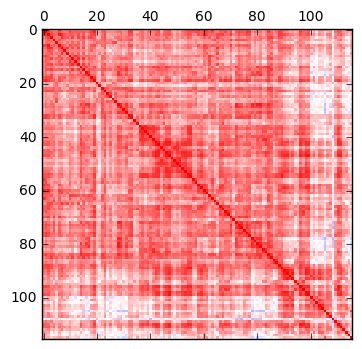

In [29]:
plt.matshow(all_corr_mat1[:,:,9], vmin=-1, vmax=1, cmap='bwr')

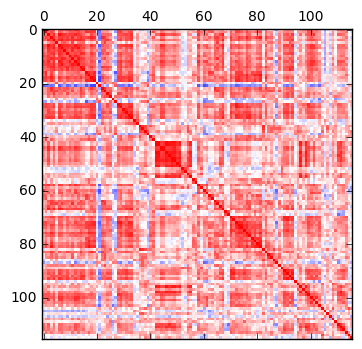

In [30]:
plt.matshow(all_corr_mat2[:,:,0], vmin=-1, vmax=1, cmap='bwr')

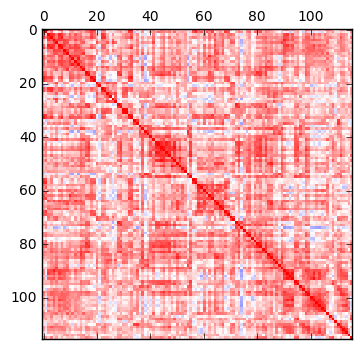

In [31]:
plt.matshow(all_corr_mat2[:,:,9], vmin=-1, vmax=1, cmap='bwr')

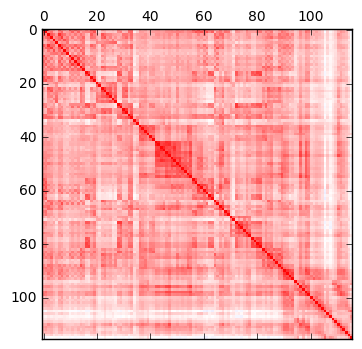

In [32]:
plt.matshow(av_corr_mat1, vmin=-1, vmax=1, cmap='bwr')

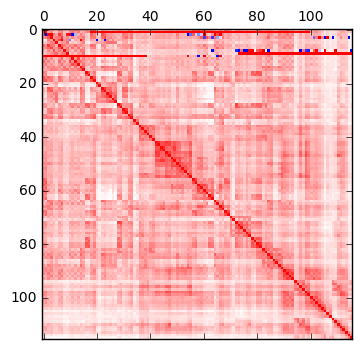

In [33]:
plt.matshow(av_corr_mat2, vmin=-1, vmax=1, cmap='bwr')

In [34]:
np.fill_diagonal(av_corr_mat1, 0)
np.fill_diagonal(av_corr_mat2, 0)

np.round([(av_corr_mat1.min(), av_corr_mat1.max()), (av_corr_mat2.min(), av_corr_mat2.max())])

array([[ -0.00000000e+000,   1.00000000e+000],
       [ -8.49544950e+295,   1.99368848e+110]])

In [35]:
np.fill_diagonal(all_corr_mat1[:,:,89], 0)
np.fill_diagonal(all_corr_mat1[:,:,66], 0)

np.round([(all_corr_mat1[:,:,89].min(), all_corr_mat1[:,:,89].max()), (all_corr_mat1[:,:,66].min(), all_corr_mat1[:,:,66].max())], 2)

array([[-0.27,  0.94],
       [-0.53,  0.93]])

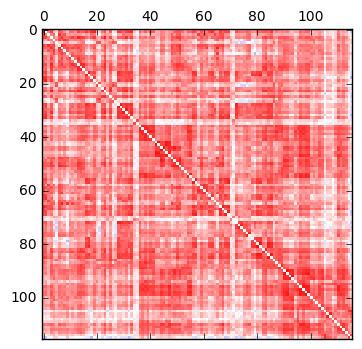

In [36]:
plt.matshow(all_corr_mat1[:,:,89], vmin=-1, vmax=1, cmap='bwr')

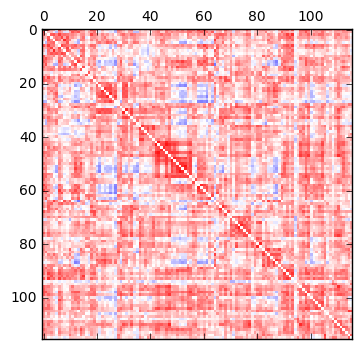

In [37]:
plt.matshow(all_corr_mat1[:,:,66], vmin=-1, vmax=1, cmap='bwr')

In [38]:
calc_rsq(av_corr_mat1, av_corr_mat2)

nan

Apparently we need to Fisher *z* transform them, which is equivalent to the arctanh function.

In [39]:
nsubs = 100
start1 = 0
start2 = 100
for i, (sub, f_id) in enumerate(df.loc[start1:(start1+nsubs),['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat_r = ts_df.corr()
    corr_mat_z = np.arctanh(corr_mat_r)

    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat1_z = np.zeros([corr_mat_z.shape[0], corr_mat_z.shape[1], nsubs])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat1_z[:, :, i] = corr_mat_z

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat1_z = np.nanmean(all_corr_mat1_z, axis=2)

for i, (sub, f_id) in enumerate(df.loc[start2:(start2+nsubs),['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat_r = ts_df.corr()
    corr_mat_z = np.arctanh(corr_mat_r)
    
    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat2_z = np.zeros([corr_mat_z.shape[0], corr_mat_z.shape[1], nsubs])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat2_z[:, :, i] = corr_mat_z

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat2_z = np.nanmean(all_corr_mat2_z, axis=2)

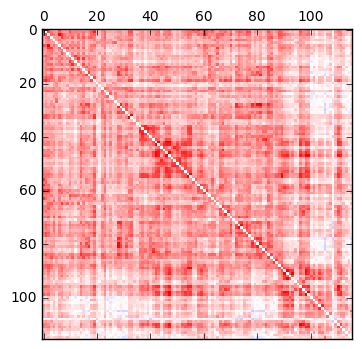

In [40]:
plt.matshow(all_corr_mat1_z[:,:,9], vmin=-1.5, vmax=1.5, cmap='bwr')

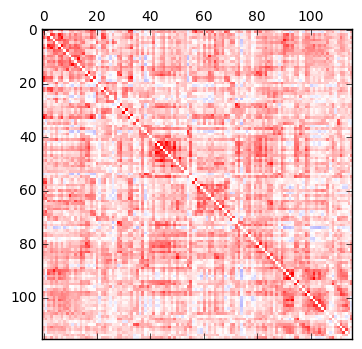

In [41]:
plt.matshow(all_corr_mat2_z[:,:,9], vmin=-1.5, vmax=1.5, cmap='bwr')

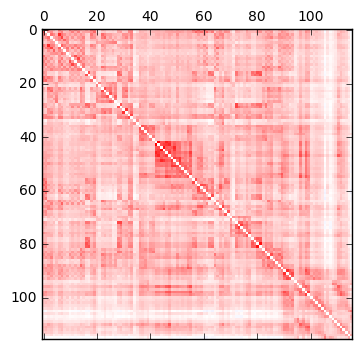

In [42]:
plt.matshow(av_corr_mat1_z, vmin=-1.5, vmax=1.5, cmap='bwr')

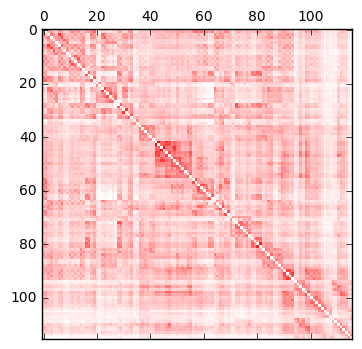

In [43]:
plt.matshow(av_corr_mat2_z, vmin=-1.5, vmax=1.5, cmap='bwr')

In [44]:
np.fill_diagonal(av_corr_mat1_z, 0)
np.fill_diagonal(av_corr_mat2_z, 0)

np.round([(av_corr_mat1_z.min(), av_corr_mat1_z.max()), (av_corr_mat2_z.min(), av_corr_mat2_z.max())],4)

array([[-0.0752,  1.6009],
       [-0.0198,  1.4522]])

In [45]:
calc_rsq(av_corr_mat1_z, av_corr_mat2_z)

0.82211375388083741

In [46]:
calc_rsq(np.random.normal(0,.0001, size=(190,190)), np.random.normal(0,.0001, size=(190,190)))

-1.0011965771557341

In [47]:
covmat = np.zeros((190, 190))
means = np.zeros(190)
np.fill_diagonal(covmat, 1)
datas1=pd.DataFrame(data=np.random.multivariate_normal(means, covmat, size=100))
datas2=pd.DataFrame(data=np.random.multivariate_normal(means, covmat, size=100))
datas1.shape

(100, 190)

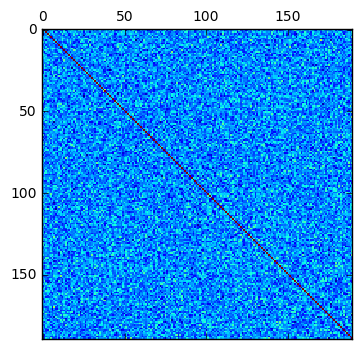

In [48]:
plt.matshow(datas1.corr())

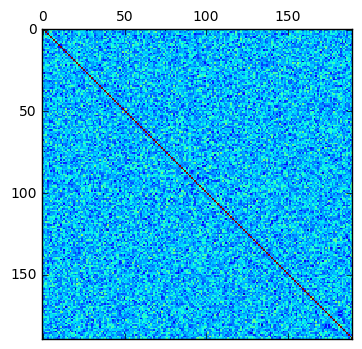

In [49]:
plt.matshow(datas2.corr())

In [50]:
calc_rsq(datas1.corr().as_matrix(), datas2.corr().as_matrix())

-1.0051594483382411

## Try out the new icc function too

In [51]:
compute_icc(datas1.corr().as_matrix(), datas2.corr().as_matrix())

-0.0075372573231548287

In [52]:
compute_icc(av_corr_mat1_z, av_corr_mat2_z)

0.92101435582748625

## Generate known correlation matrices

from [Cross Validated](http://stats.stackexchange.com/a/125017/16294)

`d` is the number of dimensions, and `betaparam` controls the width of distribution of correlation, and sets $\alpha = \beta = \text{betaparam}$

```
function S = vineBeta(d, betaparam)
    P = zeros(d);           %// storing partial correlations
    S = eye(d);

    for k = 1:d-1
        for i = k+1:d
            P(k,i) = betarnd(betaparam,betaparam); %// sampling from beta
            P(k,i) = (P(k,i)-0.5)*2;     %// linearly shifting to [-1, 1]
            p = P(k,i);
            for l = (k-1):-1:1 %// converting partial correlation to raw correlation
                p = p * sqrt((1-P(l,i)^2)*(1-P(l,k)^2)) + P(l,i)*P(l,k);
            end
            S(k,i) = p;
            S(i,k) = p;
        end
    end

    %// permuting the variables to make the distribution permutation-invariant
    permutation = randperm(d);
    S = S(permutation, permutation);
end
```

In [53]:
#def randCorrMat(d, betaparam):
d=10; betaparam=2;
P = np.zeros([d,d])
S = np.eye(d)
for k in range(0, d):
    for i in range(k+1, d):
        P[k,i] = np.random.beta(betaparam, betaparam) #sampling from beta
        P[k,i] = (P[k,i] - 0.5)*2 #linearly shifting to [-1, 1]
        print str(k) + " " + str(i) + " " + str(P[k,i])

0 1 0.620005414678
0 2 0.551649228381
0 3 -0.445228783134
0 4 0.398039421977
0 5 -0.521083896699
0 6 0.455858279576
0 7 0.579136162851
0 8 0.49934811335
0 9 -0.37099184546
1 2 0.688348556639
1 3 -0.352096548207
1 4 -0.520384964945
1 5 -0.0102071590085
1 6 -0.52661649764
1 7 -0.374942361486
1 8 0.0137104502211
1 9 0.537809838108
2 3 0.331724399173
2 4 0.51889859271
2 5 0.0536946542376
2 6 -0.326797811916
2 7 -0.308576365489
2 8 0.0812515670877
2 9 0.682674733218
3 4 -0.630154148543
3 5 0.213126686224
3 6 0.243433302577
3 7 0.00924672722759
3 8 0.280991034249
3 9 -0.364556231906
4 5 0.263418484654
4 6 -0.187218376073
4 7 0.829363512956
4 8 -0.32810213502
4 9 0.456709219902
5 6 -0.575217178289
5 7 -0.407766121519
5 8 -0.238499047855
5 9 0.598523515395
6 7 0.416329789343
6 8 0.186003665055
6 9 0.540616345938
7 8 0.0333374892862
7 9 -0.0376862798684
8 9 -0.0358295522721


In [54]:
pd.DataFrame(P)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.620005,0.551649,-0.445229,0.398039,-0.521084,0.455858,0.579136,0.499348,-0.370992
1,0.0,0.000000,0.688349,-0.352097,-0.520385,-0.010207,-0.526616,-0.374942,0.013710,0.537810
2,0.0,0.000000,0.000000,0.331724,0.518899,0.053695,-0.326798,-0.308576,0.081252,0.682675
3,0.0,0.000000,0.000000,0.000000,-0.630154,0.213127,0.243433,0.009247,0.280991,-0.364556
4,0.0,0.000000,0.000000,0.000000,0.000000,0.263418,-0.187218,0.829364,-0.328102,0.456709
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.575217,-0.407766,-0.238499,0.598524
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.416330,0.186004,0.540616
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033337,-0.037686
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.035830
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [55]:
S

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])